# Matplotlib-Challenge
Data Analytics Challenge
_____________________________________
# Pymaceuticals Inc.
---

## Analysis

### Data Overview:

1. **Total Mice in Study:**
    Total *249* mice in the study.

2. **Duplicate Mouse ID:**
    Mouse ID *(g989)* was found to be duplicate; so, it was removed.
    
3. **Total Mice under study:**
    After removing the duplicate, *248* unique mice remained in the study.

4. **Gender Distribution:**
    The study had a nearly even split between male *125* and female *123* mice.


## Drug Regimen Statistical Comparison:

**Mean, Variance, Standard Error Analysis:**

    1. Capomulin and Ramicane showed the lowest mean tumor volumes (40.68 cubic mm and 40.22 cubic mm respectively)
    2. Capomulin and Ramicane also had the smallest variance (24.95 cubic mm and 23.49 cubic mm)
    3. Standard error for Capomulin and Ramicane is lowest (0.33 cubic mm and 0.32 cubic mm); 
        So, this suggest effective performance of both these drugs.

    4. Ketapril had the highest mean tumor volume (55.24 mm³) and the largest variance (68.55 cubic mm)
    5. Standard error for Ketapril (0.60 cubic mm) is highest, which indicates lower effective results

**Number of times Each Drug was used:**

    1. Capomulin was the most frequently used treatment with 230 timepoints
    2. It was followed closely by Ramicane with 228 
    3. Propriva had the least number of timepoints at 148

Number of times each drug used is listed below:
    
Drug Regimen:    Count
- Capomulin:     230
- Ramicane:      228
- Ketapril:      188
- Naftisol:      186
- Zoniferol:     182
- Stelasyn:      181
- Placebo:       181
- Infubinol:     178
- Ceftamin:      178
- Propriva:      148

**Outlier Analysis:**

    Infubinol was the only treatment that showed an outlier, with one tumor volume measurement of 36.32 mm³.

**Capomulin (Mouse id: l509) Treatment Analysis:**

    For mouse id l509 treated with Capomulin, tumor volume initially increased from 45 cubic mm to upto 48 cubic mm over the first 20 timepoints.
    However, after timepoint 20, the tumor volume decreased,
    It shows the efficacy of Capomulin after 20th timpoint, ending at about 41 cubic mm.

**Correlation and Regression line Analysis:**

    1. According to Pearson correlation coefficient method there is a strong positive correlation between mouse weight and average tumor volume for Capomulin (0.84).
    2. Pearson correlation coefficient method for Ramicane also shows a strong correlation (0.81) between mouse weight and average tumor volume.
    3. Ceftamin Pearson correlation coefficient method showed a very weak negative correlation (-0.04) between weight and tumor volume.
    4. Infubinol shows a weak negative correlation (-0.06) between mouse weight and average tumor volume according to Pearson correlation coefficient method.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview

mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_count = len(mouse_metadata)
print(f"The Total Number of Mice : {mice_count}")

The Total Number of Mice : 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_data = mouse_study[mouse_study['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = mouse_study[mouse_study["Mouse ID"] !="g989"]
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_count = clean_mice_df['Mouse ID'].nunique()
print(f"The Total Number of Mice after Dropping Duplicates: {unique_mouse_count}")


The Total Number of Mice after Dropping Duplicates: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_volume_mean = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_volume_median = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
tumor_volume_variance = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stddev = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_stderr = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

mice_summary_stats = pd.DataFrame({
    "Mean Tumor Volume" : tumor_volume_mean,
    "Median Tumor Volume" : tumor_volume_median,
    "Tumor Volume Variance" : tumor_volume_variance,
    "Tumor Volume Std. Dev" : tumor_volume_stddev,
    "Tumor Volume Std. Err." : tumor_volume_stderr
    })

mice_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_agg_stats = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean= "mean",
                                                                               median= "median",
                                                                               var= "var",
                                                                               std= "std",
                                                                               sem= "sem"
                                                                               )
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_stats
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

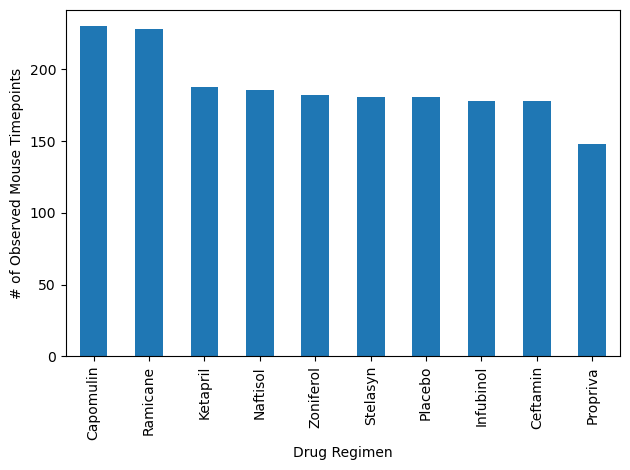

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_count= clean_mice_df["Drug Regimen"].value_counts()
drug_count.plot(kind='bar')
# Add labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
# Save and show the plot
plt.tight_layout()
plt.savefig("Bar Graph.png")
plt.show()

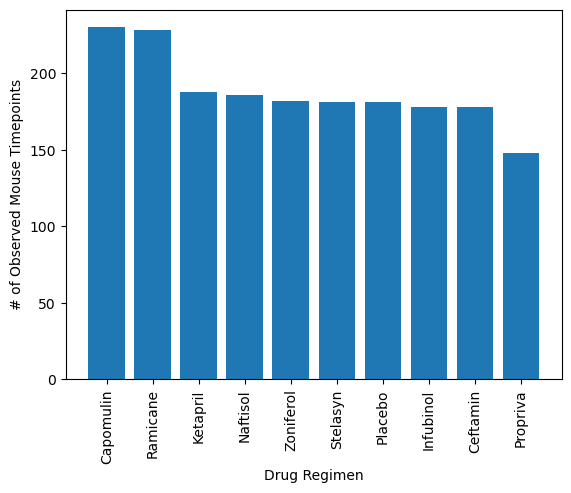

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_count.index, drug_count.values)

# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

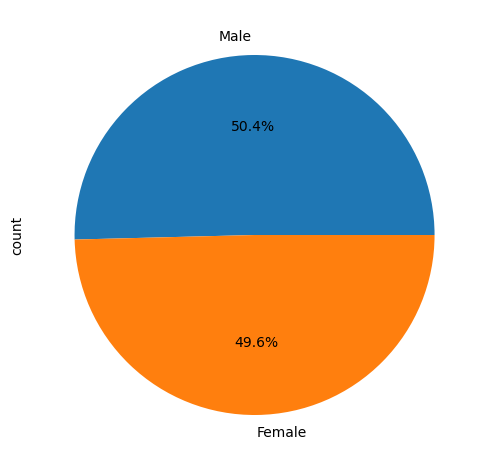

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mice_df.drop_duplicates(subset=['Mouse ID'])

gender_counts = unique_mice['Sex'].value_counts()


# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("count")
plt.tight_layout()
plt.savefig("Pie Chart.png")
plt.show()

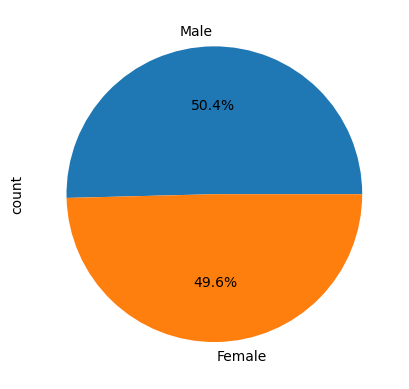

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_mice_df, on=['Mouse ID', 'Timepoint'])

final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens_list:

    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']


    # add subset
    tumor_vol_data.append(tumor_volumes)

    # Calculate quartiles and IQR using pandas
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # Determine outliers using upper and lower bounds
 
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Outliers are : {outliers}")


Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers are : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Outliers are : Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\zaina\AppData\Local\Temp\ipykernel_22972\1990338313.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(tumor_vol_data, labels=regimens_list, sym='ro')


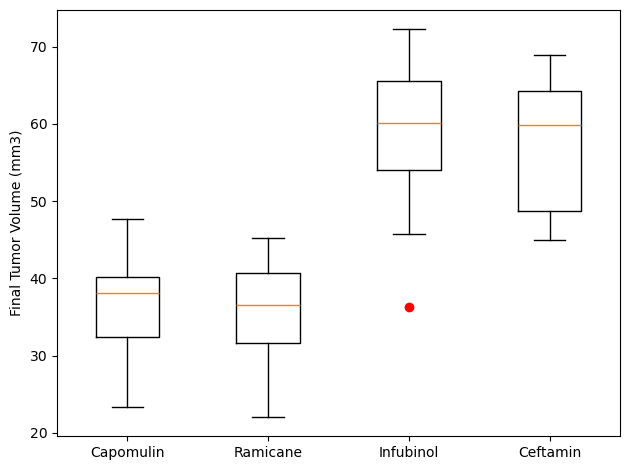

In [16]:

# Create a single figure for all box plots
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')

# Create the box plot with customized outlier appearance
ax.boxplot(tumor_vol_data, labels=regimens_list, sym='ro')

# Save and Show the Plot
plt.tight_layout()
plt.savefig("Box Plot.png")
plt.show()

## Line and Scatter Plots

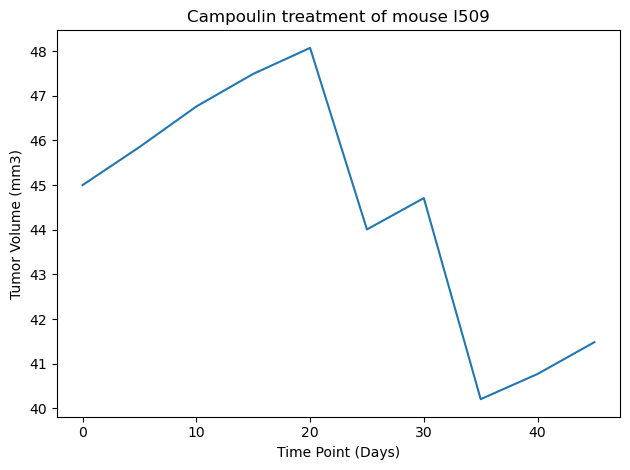

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "l509"

capomulin_data = clean_mice_df[(clean_mice_df['Mouse ID'] == mouse_id) & (clean_mice_df['Drug Regimen'] == 'Capomulin')]

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Add title and labels

plt.title("Campoulin treatment of mouse I509")
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save and Show the plot
plt.tight_layout()
plt.savefig("Line Graph.png")
plt.show()

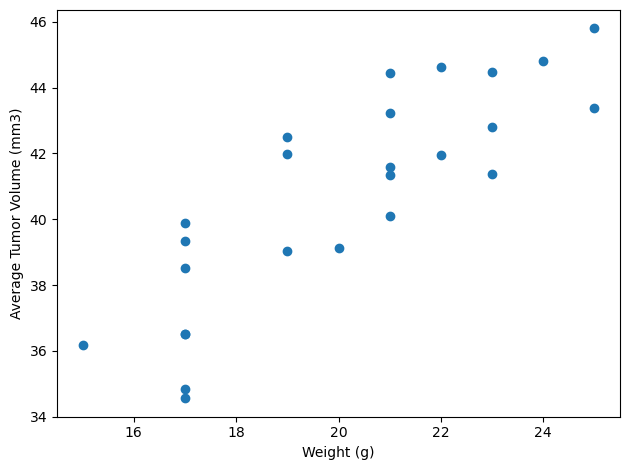

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter Capomulin data
capomulin_data = clean_mice_df[clean_mice_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Calculate the average mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, average_tumor_volume, marker='o')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Save and Show the plot
plt.tight_layout()
plt.savefig("Scatter Plot.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for Capomulin treatment is 0.84


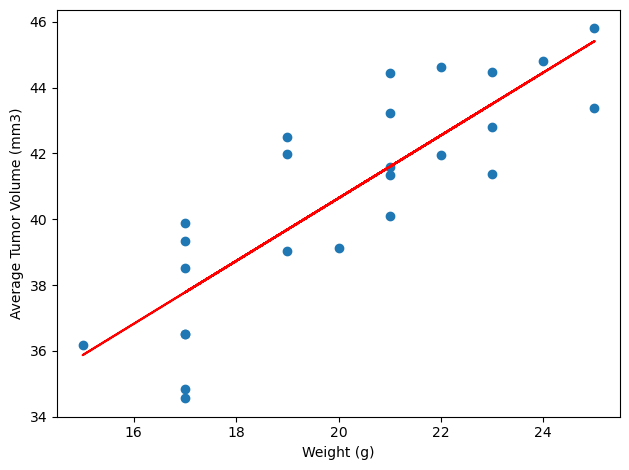

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(mouse_weights, average_tumor_volume)[0], 2)
print(f"The correlation between mouse weight and average tumor volume for Capomulin treatment is {correlation}")


slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)
line = slope * mouse_weights + intercept

plt.scatter(mouse_weights, average_tumor_volume, marker='o')

plt.plot(mouse_weights, line, color='red')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save and Show the plot
plt.tight_layout()
plt.savefig("Capomulin Correlation and Regression.png")
plt.show()

The correlation between mouse weight and average tumor volume for Ramicane treatment is 0.81


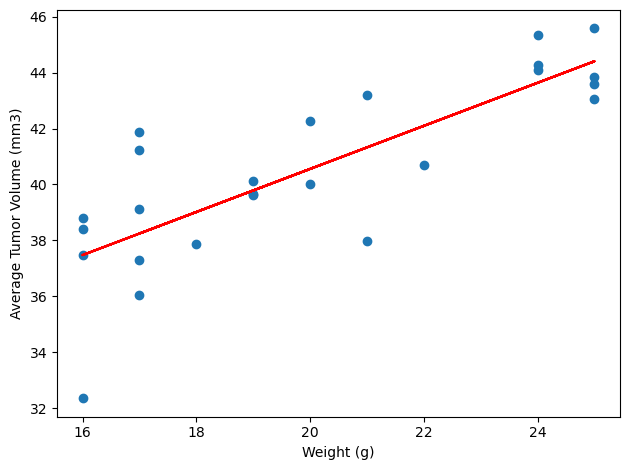

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Ramicane regimen
Ramicane_data = clean_mice_df[clean_mice_df['Drug Regimen'] == 'Ramicane']

# Calculate the average tumor volume for each mouse
average_tumor_volume_Ramicane = Ramicane_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Calculate the average mouse weights
mouse_weights_Ramicane = Ramicane_data.groupby('Mouse ID')['Weight (g)'].mean()


correlation = round(st.pearsonr(mouse_weights_Ramicane, average_tumor_volume_Ramicane)[0], 2)
print(f"The correlation between mouse weight and average tumor volume for Ramicane treatment is {correlation}")


slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights_Ramicane, average_tumor_volume_Ramicane)
line = slope * mouse_weights_Ramicane + intercept

plt.scatter(mouse_weights_Ramicane, average_tumor_volume_Ramicane, marker='o')

plt.plot(mouse_weights_Ramicane, line, color='red')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save and Show the plot
plt.tight_layout()
plt.savefig("Ramicane Correlation and Regression.png")
plt.show()

The correlation between mouse weight and average tumor volume for Infubinol treatment is -0.06


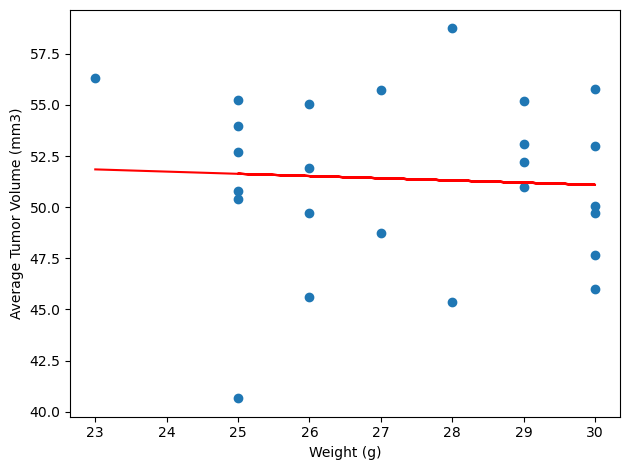

In [21]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Infubinol regimen
Infubinol_data = clean_mice_df[clean_mice_df['Drug Regimen'] == 'Infubinol']

# Calculate the average tumor volume for each mouse
average_tumor_volume_Infubinol = Infubinol_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Calculate the average mouse weights
mouse_weights_Infubinol = Infubinol_data.groupby('Mouse ID')['Weight (g)'].mean()


correlation = round(st.pearsonr(mouse_weights_Infubinol, average_tumor_volume_Infubinol)[0], 2)
print(f"The correlation between mouse weight and average tumor volume for Infubinol treatment is {correlation}")


slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights_Infubinol, average_tumor_volume_Infubinol)
line = slope * mouse_weights_Infubinol + intercept

plt.scatter(mouse_weights_Infubinol, average_tumor_volume_Infubinol, marker='o')

plt.plot(mouse_weights_Infubinol, line, color='red')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save and Show the plot
plt.tight_layout()
plt.savefig("Infubinol Correlation and Regression.png")
plt.show()

The correlation between mouse weight and average tumor volume for Ceftamin treatment is -0.04


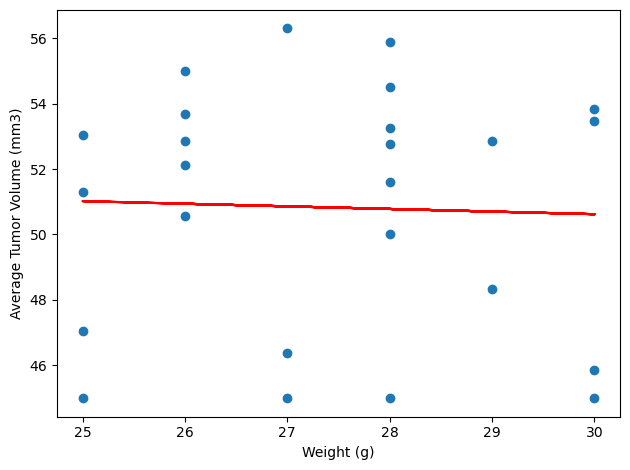

In [22]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Ceftamin regimen
Ceftamin_data = clean_mice_df[clean_mice_df['Drug Regimen'] == 'Ceftamin']

# Calculate the average tumor volume for each mouse
average_tumor_volume_Ceftamin = Ceftamin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate the average mouse weights
mouse_weights_Ceftamin = Ceftamin_data.groupby('Mouse ID')['Weight (g)'].mean()


correlation = round(st.pearsonr(mouse_weights_Ceftamin, average_tumor_volume_Ceftamin)[0], 2)
print(f"The correlation between mouse weight and average tumor volume for Ceftamin treatment is {correlation}")


slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights_Ceftamin, average_tumor_volume_Ceftamin)
line = slope * mouse_weights_Ceftamin + intercept

plt.scatter(mouse_weights_Ceftamin, average_tumor_volume_Ceftamin, marker='o')

plt.plot(mouse_weights_Ceftamin, line, color='red')

#Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save and Show the plot
plt.tight_layout()
plt.savefig("Ceftamin Correlation and Regression.png")
plt.show()